In [1]:
#@title Import libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import time  # Import the time module

#Data Preparation

In [2]:
# 2a. Load the CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
#2a. Extract Features and Labels

print("TRAINNG DATA")

print(x_train.shape)

print(y_train.shape)

print("\nTESTING DATA")

print(x_test.shape)

print(y_test.shape)

print('\n Testing to Training ratio =', x_test.shape[0]/x_train.shape[0])

TRAINNG DATA
(50000, 32, 32, 3)
(50000, 1)

TESTING DATA
(10000, 32, 32, 3)
(10000, 1)

 Testing to Training ratio = 0.2


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
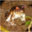

In [4]:
# Can see each element in x data is 32x32 array where each value is the grayscale value of the pixel from 0-255 where black(255)/white(0)
x_train[0]

In [5]:
#2b. Normalize the x data to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
# normalized x data
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [7]:
# 2c. Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1666666, random_state=42)


In [8]:
print("TRAINNG DATA")

print(x_train.shape)

print("\nVALIDATION DATA")

print(x_val.shape)

print("\nTEST DATA")

print(x_test.shape)

print('\n Validation to Training ratio =', x_val.shape[0]/x_train.shape[0])
print('\n Testing to Training ratio =', x_test.shape[0]/x_train.shape[0])

TRAINNG DATA
(41666, 32, 32, 3)

VALIDATION DATA
(8334, 32, 32, 3)

TEST DATA
(10000, 32, 32, 3)

 Validation to Training ratio = 0.2000192003072049

 Testing to Training ratio = 0.240003840061441


#Build and Compile the Model

In [128]:
# 3 Build the neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),  # Flatten the 32x32 input images
    keras.layers.Dense(units=256, activation='relu'),  # Increased number of units
   # keras.layers.Dropout(0.05),  # Add dropout to prevent overfitting
    keras.layers.BatchNormalization(),  # Add Batch Normalization
    keras.layers.Dense(units=190, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',  # Use SparseCategoricalCrossentropy for integer labels
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [129]:
# total number of parameters in model
total_params = model.count_params()
print(f"Total number of parameters: {total_params}")

# total number of trainable parameters in model
trainable_params = np.sum([np.prod(v.shape) for v in model.trainable_variables])
print(f"Number of trainable parameters: {trainable_params}")

Total number of parameters: 863040
Number of trainable parameters: 862148


In [130]:
#3c. model summary
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)                 │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 256)                 │         786,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 190)                 │          48,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 190)                 │             760 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 128)                 │          24,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 863,040 (3.29 MB)

 Trainable params: 862,148 (3.29 MB)

 Non-trainable params: 892 (3.48 KB)

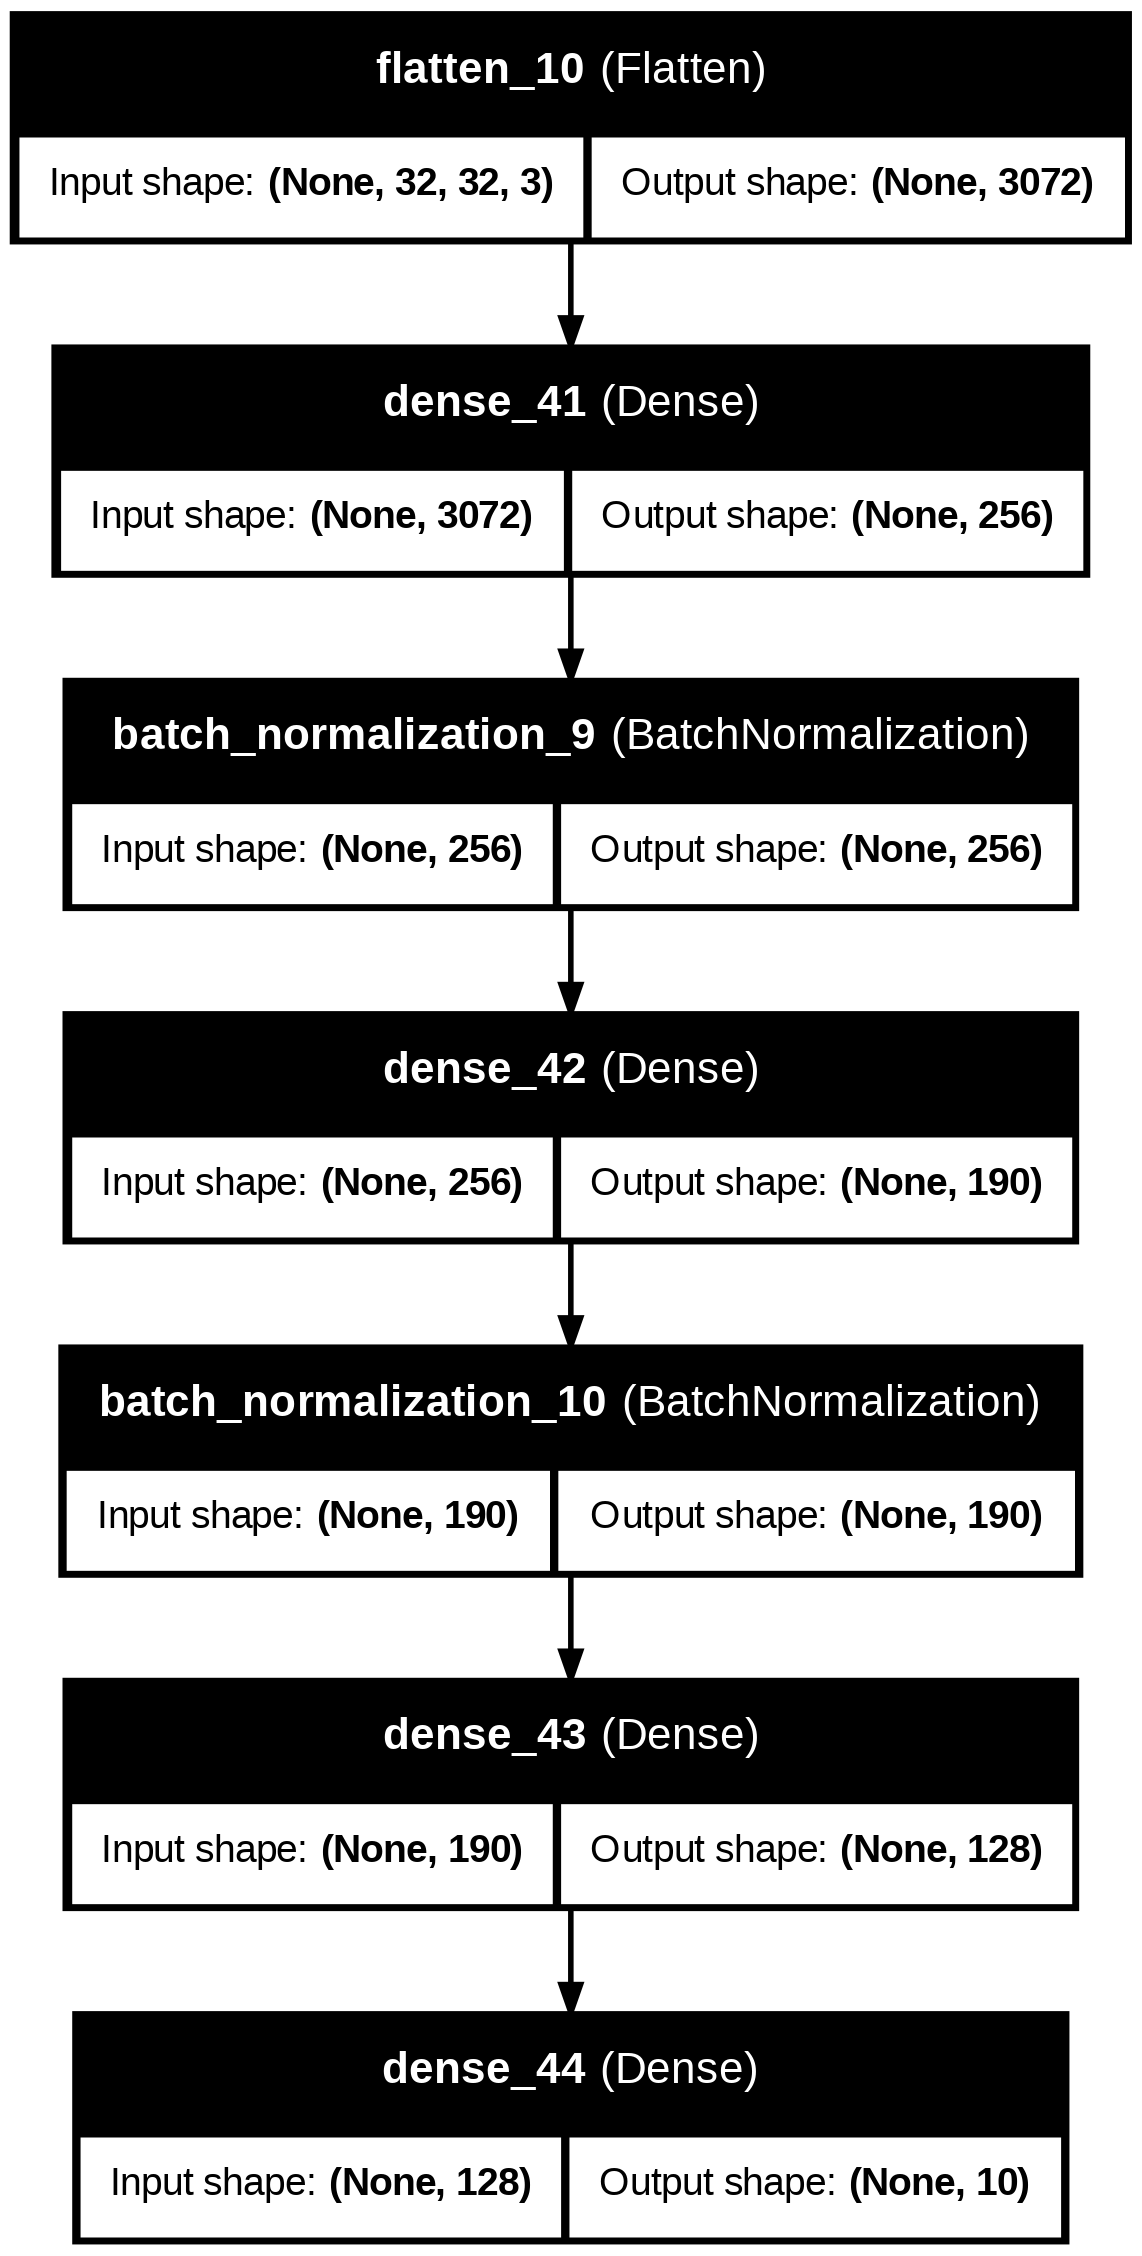

In [131]:
from tensorflow.keras.utils import plot_model

# Plot the model
plot_model(model, to_file='ANN_model.png', show_shapes=True, show_layer_names=True)

#Train the Model

In [132]:
# Train the Neural Network

# Start the timer
start_time = time.time()

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=16)

# Stop the timer
end_time = time.time()

# Calculate training time
training_time = end_time - start_time

# Print the training time
print("Training Time: {:.2f} seconds".format(training_time))

Epoch 1/10
2605/2605 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.3176 - loss: 1.9262 - val_accuracy: 0.3494 - val_loss: 1.8344
Epoch 2/10
2605/2605 ━━━━━━━━━━━━━━━━━━━━ 35s 13ms/step - accuracy: 0.4003 - loss: 1.6685 - val_accuracy: 0.4082 - val_loss: 1.6699
Epoch 3/10
2605/2605 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.4376 - loss: 1.5662 - val_accuracy: 0.4383 - val_loss: 1.5627
Epoch 4/10
2605/2605 ━━━━━━━━━━━━━━━━━━━━ 47s 16ms/step - accuracy: 0.4595 - loss: 1.5236 - val_accuracy: 0.4323 - val_loss: 1.5830
Epoch 5/10
2605/2605 ━━━━━━━━━━━━━━━━━━━━ 38s 15ms/step - accuracy: 0.4780 - loss: 1.4727 - val_accuracy: 0.4783 - val_loss: 1.4571
Epoch 6/10
2605/2605 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.4804 - loss: 1.4561 - val_accuracy: 0.4747 - val_loss: 1.4932
Epoch 7/10
2605/2605 ━━━━━━━━━━━━━━━━━━━━ 39s 14ms/step - accuracy: 0.4949 - loss: 1.4127 - val_accuracy: 0.4575 - val_loss: 1.5265
Epoch 8/10
2605/2605 ━━━━━━━━━━━━━━━━━━━━ 44s 15ms/step - accuracy: 0.5043 -

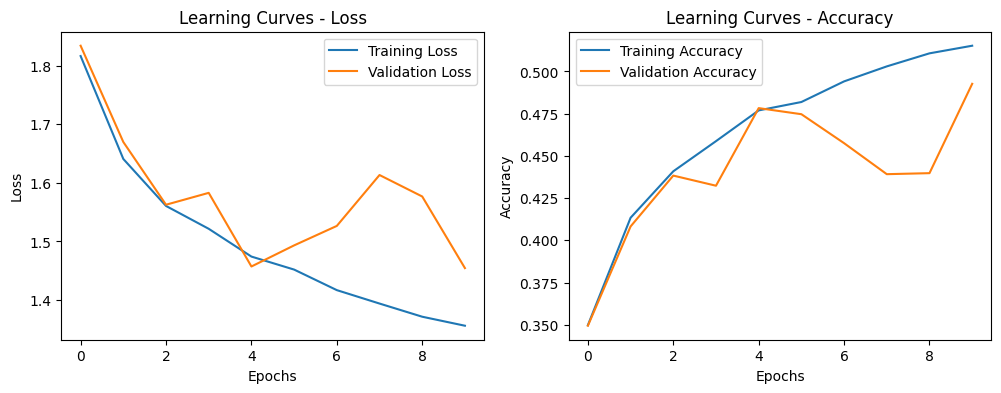

In [133]:
# Plot learning curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curves - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curves - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

To improve the model's performance, I increased the first dense layer's units to 256, allowing it to capture more complex patterns, while decreasing the size of subsequent layers to refine the learned information. Added batch normalization to stabilize and speed up the training process. Dropout was removed to prevent underfitting and give the model a chance to learn more features.I continued using the adam optimizer and loss function since they worked effectively with the dataset and labels. The batch size was set to 16 with 10 epochs, striking a balance between efficient training and avoiding overfitting. These changes helped improve the model’s accuracy.

#Test Data Performance

In [134]:
# Have model make predictions on test data
y_pred = model.predict(x_test)

# Convert predictions to class labels
y_pred = np.argmax(y_pred, axis=1)

print(y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
[3 8 0 ... 3 4 7]



Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.56      0.57      1000
           1       0.55      0.71      0.62      1000
           2       0.39      0.39      0.39      1000
           3       0.34      0.34      0.34      1000
           4       0.37      0.52      0.43      1000
           5       0.47      0.30      0.37      1000
           6       0.47      0.54      0.50      1000
           7       0.52      0.57      0.54      1000
           8       0.69      0.50      0.58      1000
           9       0.59      0.45      0.51      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.49     10000
weighted avg       0.50      0.49      0.49     10000
 




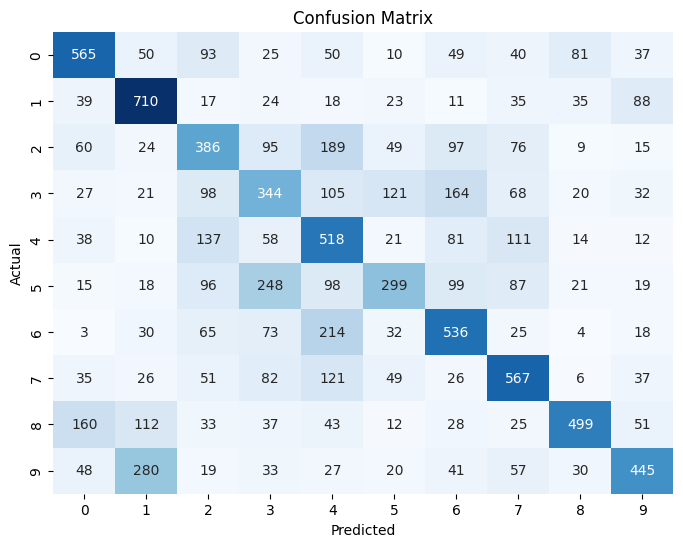

In [144]:
# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred), '\n\n')

# Make confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

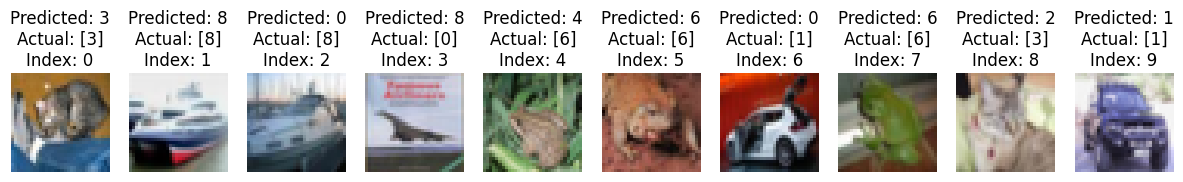

In [149]:
# Display some test images and their predicted labels
num_samples = 10
plt.figure(figsize=(15, 5))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Predicted: {y_pred[i]}\nActual: {y_test[i]}\nIndex: {i}")
    plt.axis('off')
plt.show()

PREDICTION ERRORS



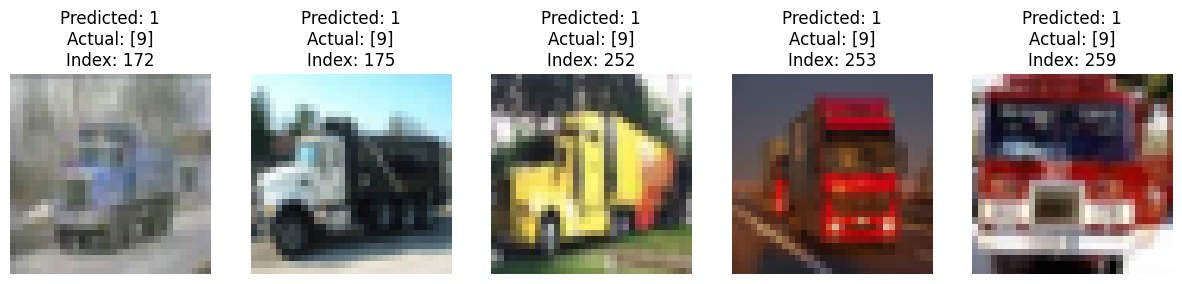

In [157]:
# Select the indices of the worst categorized images
missed_indices = np.where( (y_pred==1) & (y_test.flatten()==9) )[0]

# Determine the number of samples to display (up to 10)
num_samples = min(len(missed_indices), 5)

print('PREDICTION ERRORS\n')

# Display the predicted '1' images
plt.figure(figsize=(15, 5))
for i in range(num_samples):
    idx = missed_indices[i]
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"Predicted: {y_pred[idx]}\nActual: {y_test[idx]}\nIndex: {idx}")
    plt.axis('off')
plt.show()

PREDICTION ERRORS



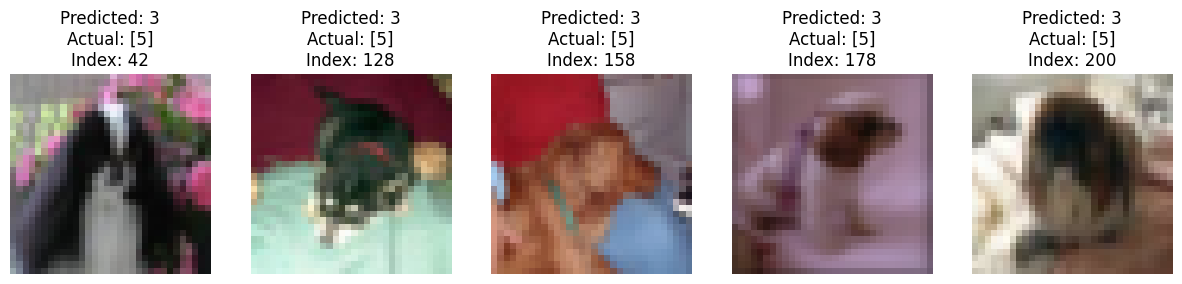

In [158]:
# Select the indices of the worst categorized images
missed_indices = np.where( (y_pred==3) & (y_test.flatten()==5) )[0]

# Determine the number of samples to display (up to 10)
num_samples = min(len(missed_indices), 5)

print('PREDICTION ERRORS\n')

# Display the predicted '1' images
plt.figure(figsize=(15, 5))
for i in range(num_samples):
    idx = missed_indices[i]
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"Predicted: {y_pred[idx]}\nActual: {y_test[idx]}\nIndex: {idx}")
    plt.axis('off')
plt.show()

In [139]:
from sklearn.metrics import f1_score

# Compute and print test F1 score
test_f1_score = f1_score(y_test, y_pred, average='weighted')

# Print the test F1 score
print(f"Test F1 Score: {test_f1_score:.4f}")

Test F1 Score: 0.4851


In [140]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

# Print the test accuracy
print(f"Test accuracy: {test_acc:.4f}")

Test accuracy: 0.4869


#Summary and Reflection

The model's performance has been evaluated based on various improvements made during the development process. Initially, the model was built with basic dense layers, but after several iterations, enhancements were applied to improve its accuracy and generalization.

**Challenges Encountered:** One of the main challenges was balancing the model's complexity with the risk of overfitting. Initially, adding too many units or layers led to overfitting, while aggressive dropout hindered the learning process. Batch normalization helped, but adjusting the network's architecture to find the right balance took time. Moreover, managing the computational resources was critical as larger batch sizes or more epochs increased training time significantly.

**Potential Ways to Further Improve:** To further improve the model, a few strategies could be considered:
1. Convolutional Layers: Introducing convolutional layers could significantly improve performance on image data like CIFAR-10, as they are better suited for spatial pattern recognition.
2. Tuning Hyperparameters: Testing different learning rates, batch sizes, and optimizers could help fine-tune the model's performance.
3. Additional Regularization: While dropout was removed in this version, reintroducing it with fine-tuned dropout rates could help reduce overfitting, especially for deeper networks.